In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import kagglehub
import os
from sqlalchemy import create_engine,text

## Завантажуємо датасет з Kaggle

In [3]:
path = kagglehub.dataset_download("robikscube/hourly-energy-consumption")

## Обєднуємо всі файли в одни DataFrame
так як всі файли мають формат csv, фіксуємо час читання з csv файлів

In [11]:
start = time.time()
df = pd.DataFrame()
for file in os.listdir(path) :
    if file == 'est_hourly.paruqet' : 
        continue
    path_file = path + "\\" + file
    temp = pd.read_csv(path_file)
    temp["Datetime"] = pd.to_datetime(temp["Datetime"])
    temp.set_index("Datetime", inplace=True)
    temp = temp[~temp.index.duplicated(keep = 'first')]
    df_copy = df.copy()
    df = pd.concat([df_copy,temp],axis=1).fillna(0)
end = time.time()
read_from_csv = end - start
read_from_csv

2.076050043106079

## Вираховуємо швидкість запису в csv файл

In [22]:
start = time.time()
df.to_csv("power.csv")
end = time.time()
write_to_csv = end - start
write_to_csv

2.803337335586548

In [5]:
df

,AEP_MW,COMED_MW,DAYTON_MW,DEOK_MW,DOM_MW,DUQ_MW,EKPC_MW,FE_MW,NI_MW,PJME_MW,...,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load,PJM_Load_MW
Datetime,,,,,,,,,,,,,,,,,,,,,
1998-04-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22259.0,22259.0
1998-04-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21244.0,21244.0
1998-04-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20651.0,20651.0
1998-04-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20421.0,20421.0
1998-04-01 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20713.0,20713.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,17673.0,16437.0,2554.0,4052.0,14038.0,1966.0,1815.0,9866.0,0.0,44057.0,...,4052.0,14038.0,1966.0,1815.0,9866.0,0.0,44057.0,6545.0,0.0,0.0
2018-08-02 21:00:00,17303.0,15590.0,2481.0,3892.0,13832.0,1944.0,1769.0,9656.0,0.0,43256.0,...,3892.0,13832.0,1944.0,1769.0,9656.0,0.0,43256.0,6496.0,0.0,0.0
2018-08-02 22:00:00,17001.0,15086.0,2405.0,3851.0,13312.0,1901.0,1756.0,9532.0,0.0,41552.0,...,3851.0,13312.0,1901.0,1756.0,9532.0,0.0,41552.0,6325.0,0.0,0.0


## Створюємо підключення до Sqlite бази даних

In [8]:
engine = create_engine('sqlite:///my_database.db')

## Фіксуємо час запису даних до SQL бази даних

In [12]:
start = time.time()
df.to_sql("power", con=engine, if_exists="replace", index=True)
end = time.time()
write_to_sql = end - start
write_to_sql

4.681362152099609

## Фіксуємо час читання з SQL бази даних

In [13]:
start = time.time()
df_sql = pd.read_sql("SELECT * FROM power", con = engine)
end = time.time()
read_from_sql = end - start
read_from_sql

1.1493632793426514

## Фіксуємо час запису в parquet файл

In [14]:
start = time.time()
df.to_parquet("power.parquet")
end = time.time()
write_to_parquet = end - start
write_to_parquet

0.4990990161895752

## Фіксуємо час читання з parquet файлу

In [15]:
start = time.time()
df_parquet = pd.read_parquet("power.parquet")
end = time.time()
read_from_parquet = end - start
read_from_parquet

0.07297873497009277

## Фіксуємо час запису в hdf5 файл

In [18]:
start = time.time()
df.to_hdf("power.h5", key = "power", mode="w")
end = time.time()
write_to_hdf5 = end - start
write_to_hdf5

0.11542630195617676

## Фіксуємо час читання з hdf5 файлу

In [19]:
start = time.time()
df_hdf5 = pd.read_hdf("power.h5")
end = time.time()
read_from_hdf5 = end - start
read_from_hdf5

0.0734560489654541

## Малюємо гістограму результатів

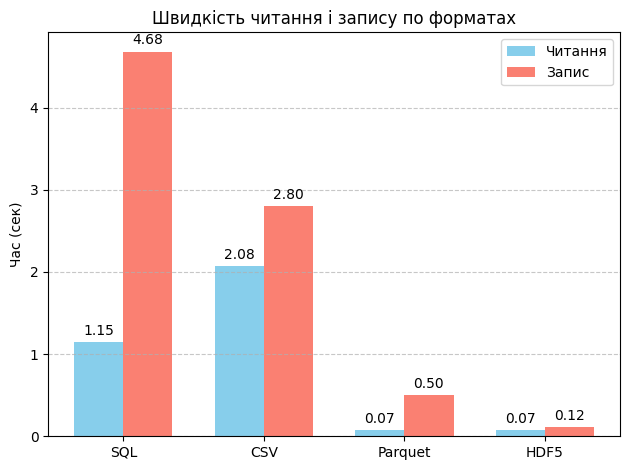

In [26]:

formats = ["SQL", "CSV", "Parquet", "HDF5"]
read_times = [read_from_sql, read_from_csv, read_from_parquet, read_from_hdf5]
write_times = [write_to_sql, write_to_csv, write_to_parquet, write_to_hdf5]

x = np.arange(len(formats))  
width = 0.35  

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, read_times, width, label='Читання', color='skyblue')
bars2 = ax.bar(x + width/2, write_times, width, label='Запис', color='salmon')


ax.set_ylabel('Час (сек)')
ax.set_title('Швидкість читання і запису по форматах')
ax.set_xticks(x)
ax.set_xticklabels(formats)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)


for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()